**LOAD LIBRARY YANG DIBUTUHKAN**

---



In [ ]:
import pandas as pd #untuk membaca csv dan membuat dataframe
import os #untuk membaca directory file
import shutil  #untuk memindahkan file
import tensorflow as tf #untuk membuat model "neural network"
from sklearn.model_selection import train_test_split #untuk membagi train data menjadi train dan validation

**LOAD DAN PREPROCESSING DATA**

---



In [ ]:
#meminta akses ke drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
base_dir = "/content/gdrive/MyDrive"
#catatan: untuk mengakses folder data harus membuat shortcut
#untuk folder Data dengan cara klik kanan pada file/folder
#lalu pilih add a shortcut to drive
#membuat dir untuk train, validation, test, female, dan male
train_dir = os.path.join(base_dir, "train_dir") #directory di /content/gdrive/MyDrive/train_dir
val_dir = os.path.join(base_dir, "val_dir") #directory di /content/gdrive/MyDrive/val_dir
female_dir = os.path.join(base_dir, "female") #directory di /content/gdrive/MyDrive/female
male_dir = os.path.join(base_dir, "male") #directory di /content/gdrive/MyDrive/male
test_dir = os.path.join(base_dir, "test")  #directory di /content/gdrive/MyDrive/test

In [ ]:
#memuat csv(label) dan folder training 
train_csv_path = "/content/gdrive/MyDrive/Data/train.csv"
FOLDER_PATH = "/content/gdrive/MyDrive/Data/Training"
#memuat hasil csv train_data
train_csv = pd.read_csv(train_csv_path)
train_csv

,nomor,jenis kelamin,usia
0,1,0,27
1,2,1,24
2,3,0,29
3,4,1,23
4,5,0,20
...,...,...,...
765,766,0,21
766,767,0,25
767,768,0,21
768,769,0,23


In [ ]:
data = [] #membuat list untuk menampung data
for r, d, f in os.walk(FOLDER_PATH):\
  data.append((r.split('/')[-1] , r)) 
"""memisah hasil string r(root) berdasarkan "/" lalu mengambil 
index terakhir dari hasil split(metode .split() ini memisah string menjadi list)
lalu menambahkan hasil split dan root kedalam list "data"
"""
df = pd.DataFrame(data,columns=['folder','file']) #membuat dataframe berdasarkan list "data"
df = df.drop(index=[0]) #membuang index pertama dari dataframe karena tidak diperlukan
df.folder = df.folder.astype(float) #mengubah isi kolom 1 menjadi float(number) agar bisa diurutkan
sorted_df = df.sort_values(by=["folder"], ascending=True, ignore_index=True) #mengubah urutan dataframe berdasarkan folder
sorted_df.drop(["folder"],axis=1,inplace=True) #membuang kolom folder karena sudah tidak diperlukan
sorted_df

,file
0,/content/gdrive/MyDrive/Data/Training/1
1,/content/gdrive/MyDrive/Data/Training/2
2,/content/gdrive/MyDrive/Data/Training/3
3,/content/gdrive/MyDrive/Data/Training/4
4,/content/gdrive/MyDrive/Data/Training/5
...,...
765,/content/gdrive/MyDrive/Data/Training/766
766,/content/gdrive/MyDrive/Data/Training/767
767,/content/gdrive/MyDrive/Data/Training/768
768,/content/gdrive/MyDrive/Data/Training/769


In [ ]:
#test_train_split ke 0.2 untuk validation data
femaletr_dir, femaleval_dir = train_test_split(os.listdir(female_dir),test_size=0.2) #0.2 dri data train female menjadi data validasi
maletr_dir, maleval_dir = train_test_split(os.listdir(male_dir),test_size=0.2) #0.2 dri data train male menjadi data validasi
#melihat hasil splitting
tr = [femaletr_dir,maletr_dir]
val = [femaleval_dir, maleval_dir]
trpa =sum([len(i) for i in tr])
valpa = sum([len(i) for i in val])
print(f'Hasil splitting adalah {trpa} untuk training dan',
      f'{valpa} untuk validation')

Hasil splitting adalah 1848 untuk training dan 463 untuk validation


In [ ]:
#membuat dir untuk data train dan validasi female dan male 
female_train_dir = os.path.join(train_dir, "female_train_dir")
male_train_dir = os.path.join(train_dir, "male_train_dir")
female_val_dir = os.path.join(val_dir, "female_val_dir")
male_val_dir = os.path.join(val_dir, "male_val_dir")
testing_dir = os.path.join(test_dir, "testing")
print(os.listdir(train_dir),os.listdir(val_dir),os.listdir(test_dir))

['female_train_dir', 'male_train_dir'] ['female_val_dir', 'male_val_dir'] ['testing']


**AUGMENTASI DATA** 

---



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                rescale=1./255,
                width_shift_range=0.1,
                height_shift_range=0.1,
                rotation_range=20,
                horizontal_flip=True,
                shear_range=0.2,
                fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(
                rescale=1./255,
                width_shift_range=0.1,
                height_shift_range=0.1,
                rotation_range=20,
                horizontal_flip=True,
                shear_range=0.2,
                fill_mode='nearest'
)
test_datagen = ImageDataGenerator(
          rescale=1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, #dir from above
        batch_size=32,
        target_size=(224,224),#change resolution to 224x224
        class_mode='binary',#binary karena cuma 2 class
        color_mode="rgb",#rgb karena gambar memiliki warna
        shuffle=True,
        seed=42
)
validation_generator = validation_datagen.flow_from_directory(
        val_dir, #dir from above
        batch_size=32,
        target_size=(224,224),#change resolution to 224x224
        class_mode='binary',#binary karena cuma 2 class
        color_mode="rgb",#rgb karena gambar memiliki warna
        shuffle=True,
        seed=42
)
test_generator = test_datagen.flow_from_directory(
        test_dir, #dir from above
        batch_size=1,
        target_size=(224,224),#change resolution to 120x120
        class_mode='binary',#binary karena cuma 2 class
        color_mode="rgb",#rgb karena gambar memiliki warna
        shuffle=False
)

Found 1848 images belonging to 2 classes.
Found 462 images belonging to 2 classes.
Found 990 images belonging to 1 classes.


**MEMBANGUN MODEL CONVOLUTIONAL NEURAL NETWORK** 

---



In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)            

In [ ]:
#mengcompile model dan menentukan loss function, optimizer, dan metrics(fungsi yang digunakan untuk menilai performa model)
model.compile(loss='binary_crossentropy',#binary karena klasifikasi 2 kelas
              optimizer=tf.optimizers.Adam(), #Adam karena gradient descent paling bagus
              metrics=['accuracy']) #accuracy karena paling mudah dipahami(benar/seluruh data)
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",       #membuat callback function untuk menghentikan proses training
                                        mode ="min", patience = 10,#apabila val_loss konsisten selama 10 sesi pelatihan(epochs)
                                        restore_best_weights = True)

NameError: ignored

**TRAINING MODEL**

---



In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size #menentukan steps per epoch berdasarkan jumlah training data dibagi batch size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
#train model dengan fungsi .fit()
history = model.fit(
      train_generator,#menunjukan directory data train
      steps_per_epoch=STEP_SIZE_TRAIN,
      epochs=3,#3 kali sesi pelatihan
      validation_data=validation_generator,#menunjukan directory data validasi
      validation_steps=STEP_SIZE_VALID,
      callbacks=[earlystopping],#memanggil fungsi callback yang sudah dibuat di sel sebelumnya
      verbose=2
)

**EVALUASI DAN TESTING**

---



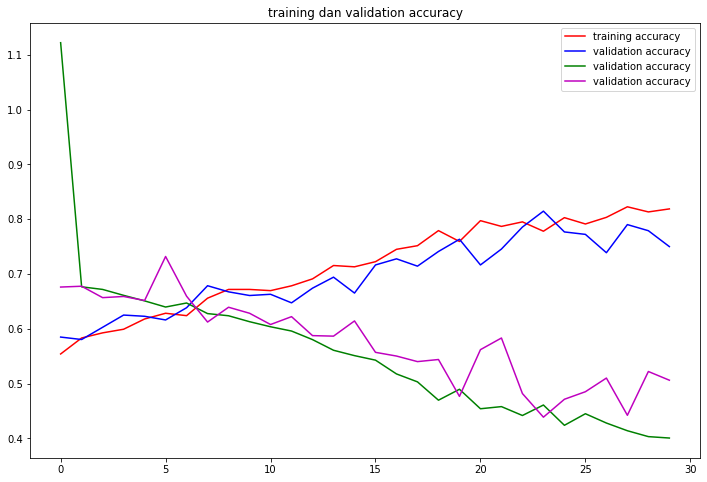

In [ ]:
#visualisasi data hasil pelatihan
import matplotlib.pyplot as plt
%matplotlib inline
#plotting akurasi dan loss
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))

plt.figure(figsize=(12,8))
plt.plot(epochs, acc, "r", label="training accuracy")
plt.plot(epochs, val_acc, "b", label="validation accuracy")
plt.plot(epochs, loss, "g", label="validation accuracy")
plt.plot(epochs, val_loss, "m", label="validation accuracy")
plt.title("training dan validation accuracy")
plt.legend(loc=0)
plt.show()

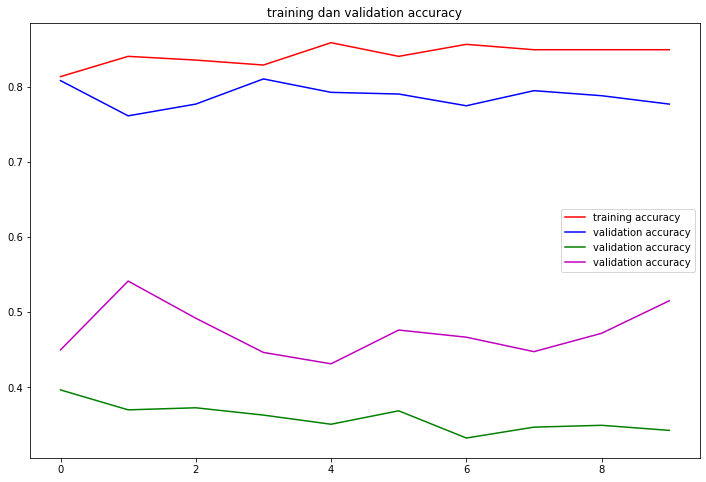

In [ ]:
#plotting akurasi dan loss
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))

plt.figure(figsize=(12,8))
plt.plot(epochs, acc, "r", label="training accuracy")
plt.plot(epochs, val_acc, "b", label="validation accuracy")
plt.plot(epochs, loss, "g", label="validation accuracy")
plt.plot(epochs, val_loss, "m", label="validation accuracy")
plt.title("training dan validation accuracy")
plt.legend(loc=0)
plt.show()

In [ ]:
model.evaluate(validation_generator,
steps=STEP_SIZE_VALID)

14/14 [==============================] - 27s 2s/step - loss: 0.5617 - accuracy: 0.7679


[0.5616889595985413, 0.7678571343421936]

In [ ]:
#men-generate hasil untuk test data menggunakan model yang telah dibuat dan ditrain diatas
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict(test_generator,
              steps=STEP_SIZE_TEST,
              verbose=2)
print(pred)

990/990 - 61s
[[9.96239543e-01]
 [4.52815920e-01]
 [1.02559984e-01]
 [8.12841535e-01]
 [7.40158558e-01]
 [2.31364369e-03]
 [9.72638965e-01]
 [2.27627158e-03]
 [2.09021837e-01]
 [4.15250659e-03]
 [5.85107148e-01]
 [2.26183772e-01]
 [4.86168206e-01]
 [8.70227337e-01]
 [3.87390971e-01]
 [8.39195669e-01]
 [3.02138925e-03]
 [6.04731441e-02]
 [9.83563781e-01]
 [2.37351477e-01]
 [7.20164180e-02]
 [6.68016791e-01]
 [2.84419400e-07]
 [1.73032284e-04]
 [9.99977469e-01]
 [4.70194459e-01]
 [8.10152054e-01]
 [9.26756740e-01]
 [1.93679720e-01]
 [4.02840555e-01]
 [7.80398607e-01]
 [1.69878155e-01]
 [8.08355212e-01]
 [9.64669466e-01]
 [8.56838524e-01]
 [3.83628637e-01]
 [2.32502788e-01]
 [1.81630254e-03]
 [3.38808507e-01]
 [1.75992250e-02]
 [3.37015688e-02]
 [3.51874948e-01]
 [2.26498157e-01]
 [6.23875320e-01]
 [7.87668586e-01]
 [5.72638214e-01]
 [1.30707026e-02]
 [9.64423656e-01]
 [4.13710654e-01]
 [4.72605616e-01]
 [1.14536583e-02]
 [9.67745245e-01]
 [7.64629960e-01]
 [8.27579975e-01]
 [1.77037805e-

In [ ]:
#mengubah hasil output menjadi 0 dan 1
y=[]
for arr in pred:
  x=float(arr)
  x=round(x)
  y.append(x)
y

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,


In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y]
print(predictions, train_generator, sep="\n")

['male_train_dir', 'female_train_dir', 'female_train_dir', 'male_train_dir', 'male_train_dir', 'female_train_dir', 'male_train_dir', 'female_train_dir', 'female_train_dir', 'female_train_dir', 'male_train_dir', 'female_train_dir', 'female_train_dir', 'male_train_dir', 'female_train_dir', 'male_train_dir', 'female_train_dir', 'female_train_dir', 'male_train_dir', 'female_train_dir', 'female_train_dir', 'male_train_dir', 'female_train_dir', 'female_train_dir', 'male_train_dir', 'female_train_dir', 'male_train_dir', 'male_train_dir', 'female_train_dir', 'female_train_dir', 'male_train_dir', 'female_train_dir', 'male_train_dir', 'male_train_dir', 'male_train_dir', 'female_train_dir', 'female_train_dir', 'female_train_dir', 'female_train_dir', 'female_train_dir', 'female_train_dir', 'female_train_dir', 'female_train_dir', 'male_train_dir', 'male_train_dir', 'male_train_dir', 'female_train_dir', 'male_train_dir', 'female_train_dir', 'female_train_dir', 'female_train_dir', 'male_train_dir', '

In [ ]:
#membuat hasil output menjadi dataframe dan menggabungnya ke file submission.csv
SUBMISSION_PATH = "/content/gdrive/MyDrive/Data/submission.csv"
submis = pd.read_csv(SUBMISSION_PATH)
value = pd.DataFrame(y, columns=["jenis kelamin"])
value

,jenis kelamin
0,1
1,0
2,0
3,1
4,1
...,...
985,1
986,0
987,1
988,0


In [ ]:
submission = pd.concat([subm, value], axis=1)
submission.to_csv("submission1.csv",index=False)
submission1.csv
submission.csv align centre

**SELESAI**